In [ ]:
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


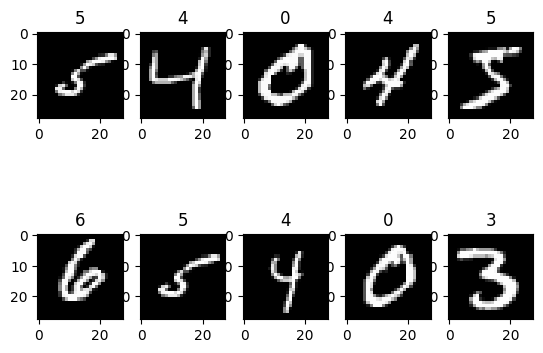

In [ ]:
for index in range(10):
  plt.subplot(2, 5, index + 1)

  for i in np.random.randint(m, size=10):
    plt.imshow(x_train[:,i].reshape(28,28),cmap= 'gray')
    plt.title(y_train[i])

plt.show()

Keras Dense layer

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
l,m,n = x_train.shape
o,p,q = x_test.shape

x_train = x_train.reshape(l, m*n) / 255
x_test = x_test.reshape(o, p*q) / 255

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

y_train = one_hot(y_train)
y_test = one_hot(y_test)


print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(128, input_shape=(28*28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=15, batch_size=128)
# evaluate the keras model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
469/469 [==============================] - 5s 5ms/step - loss: 0.3319 - accuracy: 0.9072
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1349 - accuracy: 0.9604
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0938 - accuracy: 0.9717
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0714 - accuracy: 0.9788
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0547 - accuracy: 0.9837
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0395 - accuracy: 0.9873
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0310 - accuracy: 0.9904
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0216 - accuracy: 0.9932

with keras CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 48s 108ms/step - loss: 1.5504 - accuracy: 0.5061 - val_loss: 0.5013 - val_accuracy: 0.8690
Epoch 2/15
422/422 [==============================] - 42s 100ms/step - loss: 0.5720 - accuracy: 0.8216 - val_loss: 0.3310 - val_accuracy: 0.9097
Epoch 3/15
422/422 [==============================] - 44s 105ms/step - loss: 0.4493 - accuracy: 0.8624 - val_loss: 0.2568 - val_accuracy: 0.9320
Epoch 4/15
422/422 [==============================] - 47s 113ms/step - loss: 0.3742 - accuracy: 0.8886 - val_loss: 0.2086 - val_accuracy: 0.9443
Epoch 5/15
422/422 [==============================] - 43s 103ms/step - loss: 0.3184 - accuracy: 0.9036 - val_loss: 0.1760 - val_accuracy: 0.9562
Epoch 6/15
422/422 [==============================] - 46s 110ms/step - loss: 0.2796 - accuracy: 0.9160 - val_loss: 0.1521 - val_accuracy: 0.9610
Epoch 7/15
422/422 [==============================] - 43s 102ms/step - loss: 0.2515 - accuracy: 0.9244 - val_loss: 0.1343 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09225337952375412
Test accuracy: 0.9732000231742859
